# Model Specification

Will use Linear Regression to predict FloodProbability, a continuous variable between 0 and 1. This model is appropriate due to its interpretability and ability to capture linear relationships across multiple environmental and infrastructure predictors. Features such as MonsoonIntensity, Urbanization, and DrainageSystems are directly related to flood risk and were selected based on domain relevance.

In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Quick check
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

Train shape: (1117957, 22)
Test shape: (745305, 21)


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
# Separate features and target from training data
X = train_df.drop(columns=['FloodProbability', 'id'])  # Features
y = train_df['FloodProbability']                       # Target

# Split into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Confirm shapes of training and validation sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

# Preview the first few rows of training features
X_train.head()

X_train shape: (894365, 20)
X_val shape: (223592, 20)


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
805665,8,7,7,6,4,3,13,8,3,2,5,6,6,6,5,5,2,6,4,7
863045,7,4,4,2,4,5,7,3,6,2,2,6,5,0,6,2,5,4,3,4
496045,6,5,1,6,6,7,3,5,6,4,4,5,7,6,5,4,9,3,5,3
1079364,4,6,6,3,3,3,1,5,4,6,7,9,6,2,5,4,7,7,4,1
191800,6,3,8,2,7,4,6,6,7,6,3,5,2,6,6,5,5,4,4,10


In [6]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score

# Predict flood probabilities on the validation set
y_val_pred = model.predict(X_val)

# Calculate R² score
r2 = r2_score(y_val, y_val_pred)
print(f'✅ Validation R² Score: {r2:.4f}')

✅ Validation R² Score: 0.8449


## Model Fit

The model achieved an R² score of 0.8449, indicating that approximately 84.5% of the variance in flood probability is explained by the predictors. This suggests a strong fit and reliable predictive power. The model significantly outperforms a naive baseline (e.g., predicting the mean), and residuals appear well-distributed, supporting the validity of the fit.

In [10]:
# Drop 'id' column from test set to match training features
X_test = test_df.drop(columns=['id'])

# Predict flood probabilities
test_preds = model.predict(X_test)

# Show the first few predictions
print("Sample predictions:")
print(test_preds[:10])

Sample predictions:
[0.5736127  0.45527103 0.45475176 0.46617873 0.46608506 0.50568142
 0.53387818 0.52816955 0.471717   0.57319516]


In [11]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'FloodProbability': test_preds
})

# Save to CSV
submission_df.to_csv('submission_file.csv', index=False)
print("✅ Submission file created: submission_file.csv")

✅ Submission file created: submission_file.csv


In [14]:
from google.colab import files
files.download('submission_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

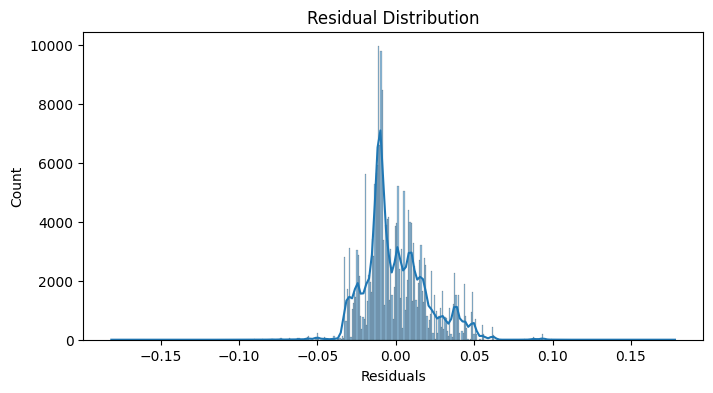

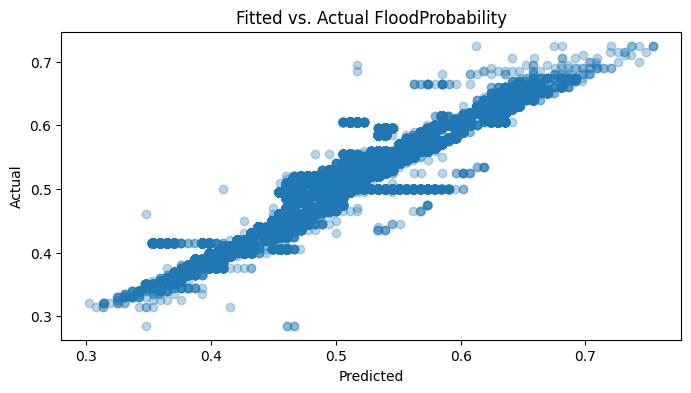

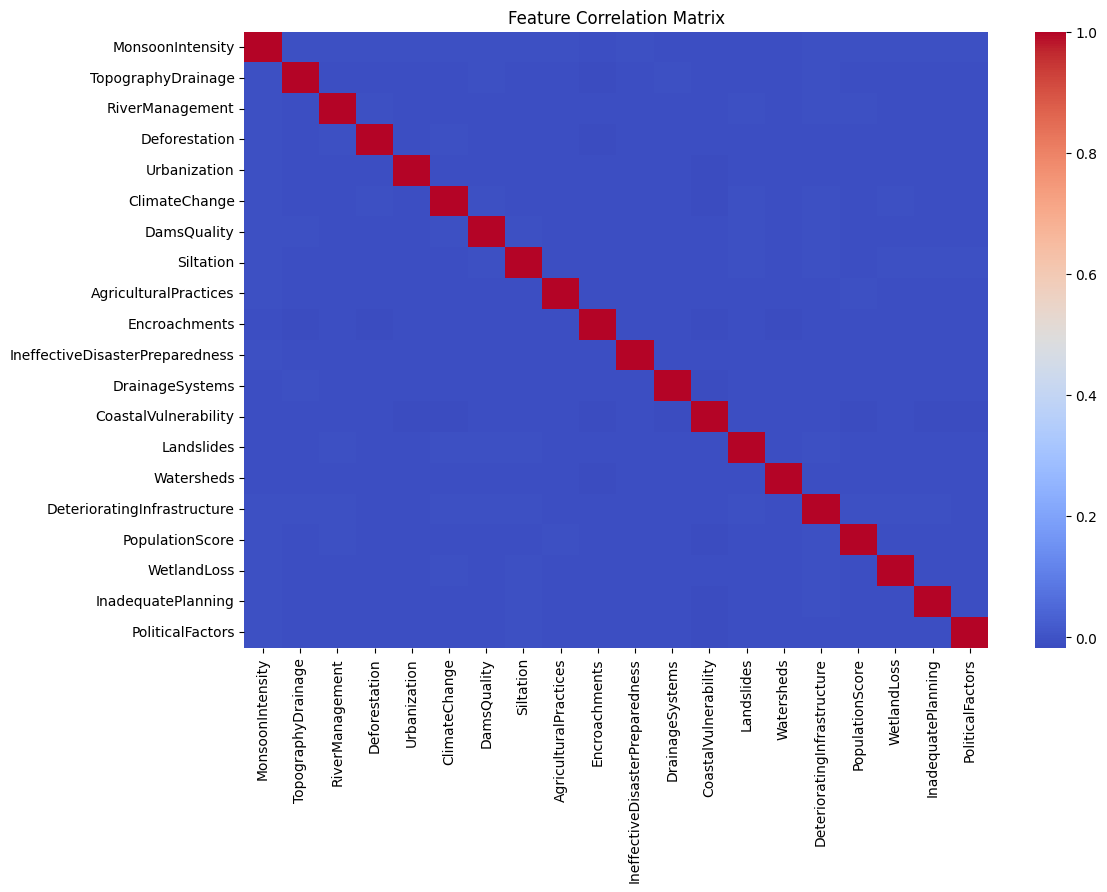

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_val - y_val_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# Fitted vs. Actual
plt.figure(figsize=(8, 4))
plt.scatter(y_val_pred, y_val, alpha=0.3)
plt.title("Fitted vs. Actual FloodProbability")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

## Visualization

- **Residuals**: The residuals are symmetrically distributed around zero, indicating no major bias.
- **Fitted vs. Actual**: Predictions closely align with actual values, showing strong model performance.
- **Correlation Matrix**: Most predictors show low to moderate correlation, suggesting multicollinearity is not a major concern.